<a href="https://colab.research.google.com/github/Pinki222001/Pinki222001/blob/main/Plate_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project : Automatic Number Plate Recognition with opencv and Easy OCR

Libraries : opencv ( using this all image are read)  ,
            Easy OCR ( using this to find the text from the given image )

In [ ]:
# Check Version of CUDA present in our System 
# CUDA is an parallel computing platform

!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


2. Installing and Importing the required Packages

In [ ]:
!pip install easyocr
!pip install imutils               # image processing function such as translation, rotation, resizing, skeletonization, and displaying Matplotlib images
!pip install opencv-python-headless==4.1.2.30
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

     |████████████████████████████████| 70.8 MB 12 kB/s 
     |████████████████████████████████| 47.6 MB 1.5 MB/s 
     |████████████████████████████████| 21.8 MB 1.6 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.5.4.60
    Uninstalling opencv-python-headless-4.5.4.60:
      Successfully uninstalled opencv-python-headless-4.5.4.60
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113


In [ ]:
import cv2    #  (openCV) open-source library , by using it, one can process images and videos to identify objects, faces, or even handwriting of a human
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

3. Convert Colored Image into Grayscale

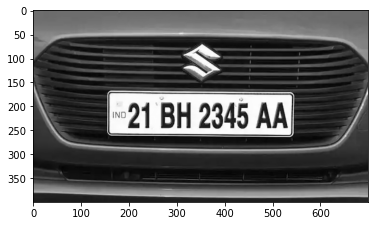

In [ ]:
img=cv2.imread('/content/cc.jpg')
# rgb to gray because color image have more pixel count so more complex to read then firse convert rgb to gray

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)   #cv2 take BGR  (bue green red)    , cvt means convert color

plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

4. Apply Filter and Edge Detection

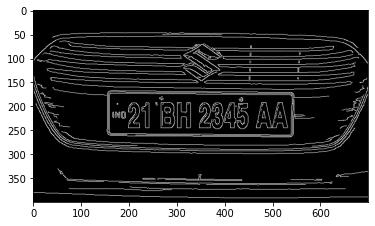

In [ ]:
# Using edge detection to remove the extra data from the image and convert into edge formate

# A bilateral filter is a non-linear, edge-preserving, and noise-reducing smoothing filter for images. 
# It replaces the intensity of each pixel with a weighted average of intensity values from nearby pixels.

bfilter = cv2.bilateralFilter(gray , 11, 17, 17)   # noise reduction
edged = cv2.Canny(bfilter, 30, 200)  # Canny() :  how to detect edges in Python
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

5. Find Contours and Apply Mask

In [ ]:
# Contours store the all polygon shape item ( to detect the plate)
#  use findContours() method of cv2 library to find all boundary points(x,y) of an object in the image
#  RETR_TREE finds all the promising contour lines and reconstructs a full hierarchy of nested contours
# CHAIN_APPROX_SIMPLE : returns only the endpoints that are necessary for drawing the contour line.
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea,reverse=True)[:10]

In [ ]:
# variable declare
 # all polygon  item store into contours variable then we traverse it and find rectangle shape polygon and print
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break 

In [ ]:
location

array([[[159, 176]],

       [[537, 176]],

       [[539, 257]],

       [[163, 257]]], dtype=int32)

In [ ]:
# Better recognition using mask
mask = np.zeros(gray.shape, np.uint8)
new_img = cv2.drawContours(mask, [location],0,255,-1)
new_img = cv2.bitwise_and(img, img, mask=mask)

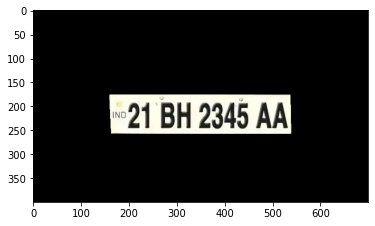

In [ ]:
plt.imshow(cv2.cvtColor(new_img,cv2.COLOR_BGR2RGB))         # all pixel rather then number plate are off

In [ ]:
(x,y) = np.where(mask==255)
(x1 ,y1) = (np.min(x),np.min(y))
(x2, y2) = (np.max(x),np.max(y))
cropped_image = gray[x1:x2+1,y1:y2+1]

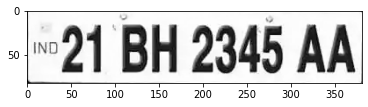

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

6. Use Easy OCR to read text

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[2, 30], [40, 30], [40, 54], [2, 54]], 'IND', 0.861893301516676),
 ([[28, 6], [381, 6], [381, 80], [28, 80]],
  '21 BH 2345 AA',
  0.9172399101483343)]

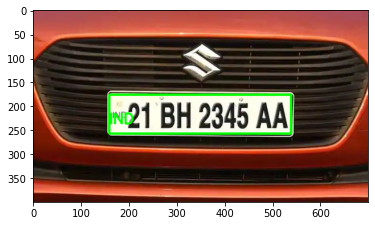

In [ ]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font,fontScale=1,color=(0,255,0),thickness=2,lineType=120)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))